<a href="https://colab.research.google.com/github/LeeHuiJong/SkillTreePython-DataAnalysis/blob/main/ch05_03_%EA%B8%B0%EC%B4%88%EB%AA%A8%EB%8D%B8%EA%B5%AC%ED%98%84_%ED%9A%8C%EA%B7%80%EB%AA%A8%EB%8D%B8%EB%A7%9B%EB%B3%B4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch05.03. 기초모델 구현 - 회귀모델 맛보기
---
* 날짜:
* 이름:

## 학습내용
    - 회귀 분석의 개념에 대해 이해한다
    - 단순 회귀 문제일 때의 프로세스에 대해 이해한다.
    - 다중 회귀 문제일 때의 프로세스에 대해 이해한다.
    - 모델링에 대한 전체적인 프로세스 과정을 이해한다. 

```
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

## 단순 회귀 문제
---




|공부시간(x)|종합점수(y)|
|------|---|
|3|20|
|5|50|
|5|60|
|7|90|
|8|100|

* 데이터 정의

In [45]:
xs = np.array([3,5,5,7,8])
ys = np.array([20,50,60,90,100])
print(xs.shape)
print(ys.shape)

(5,)
(5,)


* 데이터 시각화

<function matplotlib.pyplot.show>

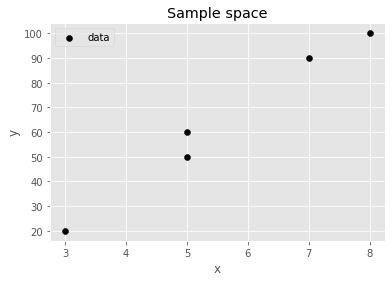

In [46]:
plt.scatter(xs,ys, c='k', label='data')
plt.title('Sample space')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show

### **| step 1. 모델 구현**

$model(x;w) = wx$

* 모델 정의

In [175]:
def model_simple(x, w=1):
  return x*w

* 초기 모델 사용


|공부시간(x)|종합점수(y)| 예측값 ($\hat{y})$|
|------|---|--|
|3|20|3|
|5|50|5|
|5|60|5|
|7|90|7|
|8|100|8|

In [48]:
model_simple(xs)

array([3, 5, 5, 7, 8])

### **| step 2. 손실 (loss) 계산**

$loss = |(\hat{y}-y)|$

* 손실 계산 과정 정의

In [106]:
# 순전파 
def propagation(xs, ys, w):
  total_loss = 0
  for x,y in zip(xs, ys):  # 모든 데이터셋 x,y 에 대해서
    y_pred = model_simple(x, w)  # 예측값 구하기
    loss = np.abs(y_pred-y)  # 손실 구하기
    total_loss += loss  # 전체 샘플의 손실 구하기
    #print(f'x:{x}, y{y}, y_pred{y_pred}, loss{loss}')
  return total_loss

propagation(xs, ys, 1)
#print(f'total loss: {total_loss}')

292

In [56]:
total_loss = 0
for x,y in zip(xs,ys):
  y_pred = model_simple(x, 3)
  loss = np.abs(y_pred-y)
  total_loss += loss
print(total_loss)

236


### **| step 3. 최적화 (Optimizer)**


*  학습 파라미터 $w$를 5부터 20까지 바꿔가며 손실 계산하기


<function matplotlib.pyplot.show>

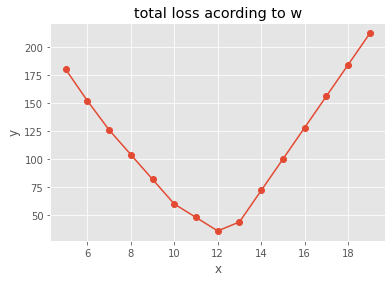

In [28]:
ws = np.arange(5,20)
total_losses = propagation(xs, ys, ws) # w값에 따른 total loss 배열

# w 값에 따른 total loss 시각화
plt.plot(ws, total_losses, marker ='o')
plt.title('total loss acording to w')
plt.xlabel('x')
plt.ylabel('y')
#plt.legend()
plt.show # w를 12로 정하면 값을 가장 잘 정의해 줄 수 있다.

### **| step 4. 예측 (Prediction)**

* 학습 완료된 모델의 최종 손실 계산

In [29]:
w_ = 12
propagation(xs, ys, w_)

36

* 학습 완료된 모델에 대한 예측 시각화

In [33]:
x_every = np.arange(11)
print(x_every)
y_preds = model_simple (x_every, w_)

[ 0  1  2  3  4  5  6  7  8  9 10]


<function matplotlib.pyplot.show>

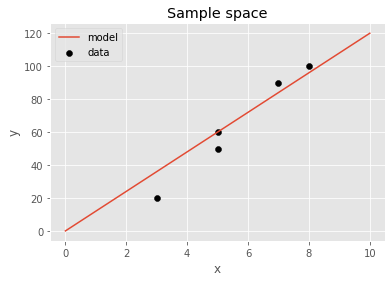

In [34]:
# 데이터 시각화
plt.scatter(xs, ys, c='k', label='data')
# 모델 시각화
plt.plot(x_every, y_preds, label='model')

plt.title('Sample space')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show

* 공부시간이 6시간일 때 예상 점수는?


In [35]:
model_simple(6, w_)

72

### **| step 5. 평가 (Evaluation)**

* 훈련 데이터셋

|공부시간(x)|종합점수(y)|
|------|---|
|3|20|
|5|50|
|5|60|
|7|90|
|8|100|

* 테스트 데이터셋

|공부시간(x)|종합점수(y)|
|------|---|
|1|5|
|2|15|
|5|55|
|6|80|
|7|85|

* 테스트 데이터셋 정의

In [36]:
x_tests = np.array([1,2,5,6,7])
y_tests =np.array([5,15,55,80,85])
x_tests.shape, y_tests.shape

((5,), (5,))

* 학습 완료된 모델에 테스트 데이터로 최종 손실 계산 (평가)

In [37]:
propagation(x_tests, y_tests, w_)

30

* 학습 완료된 모델에 테스트 데이터 예측 시각화

<function matplotlib.pyplot.show>

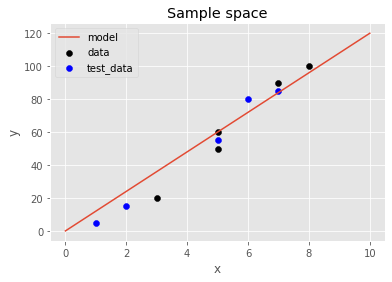

In [40]:
# 데이터 시각화
plt.scatter(xs, ys, c='k', label='data')
# 모델 시각화
plt.plot(x_every, y_preds, label='model')
# 테스트 데이터
plt.scatter(x_tests, y_tests, c='b', label='test_data')
plt.title('Sample space')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show

## 다중 회귀 문제
---



|공부시간|수면시간|종합점수|
|------|---|--|
|2|9|20|
|6|8|50|
|4|7|60|
|7|6|90|
|8|6|100|


* 데이터 정의

In [60]:
x = np.array([2,9,6,8,4,7,7,6,8,6]).reshape(5,2)
ys = np.array([20,50,60,90,100])
x.shape, ys.shape

((5, 2), (5,))

* 데이터 시각화

No handles with labels found to put in legend.


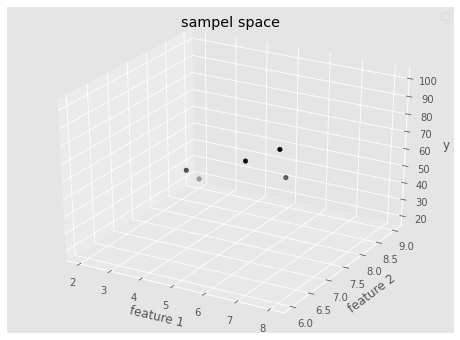

In [65]:
fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')
# x1(피처1), x2(피처2), y
x1s = x[:, 0] # 모든 샘플, 첫번째 피처
x2s = x[:, 1] # 모든 샘플, 두번째 피처
ax.scatter3D(x1s, x2s, ys, c='k')

ax.set_title('sampel space')
ax.set_xlabel('feature 1')
ax.set_ylabel('feature 2')
ax.set_zlabel('y')
plt.legend()
plt.show()

### **| step 1. 모델 구현**

$model(\vec{x};\vec{w}) = w_1x_1+w_2x_2$

* 모델 정의

In [66]:
def model_multi(x1, x2, w1=1, w2=1): # 찾아야하는 학습 파라미터가 2개
  return x1*w1+x2*w2

* 초기 모델 사용


|공부시간|수면시간|종합점수|예측값 ($\hat{y}$)|
|------|---|--|--|
|2|9|20|11
|6|8|50|14
|4|7|60|11
|7|6|90|13
|8|6|100|14

In [70]:
x1s, x2s = x[:,0], x[:,1]
model_multi(x1s, x2s)

array([11, 14, 11, 13, 14])

### **| step 2. 손실 (loss) 계산**

$loss = |(\hat{y}-y)|$

* 손실 계산 과정 정의

In [74]:
# 순전파 
def propagation(x, ys, w1, w2):
  total_loss = 0
  for x,y in zip(x, ys):  # 모든 데이터셋 x,y 에 대해서
    y_pred = model_multi(x[0],x[1], w1=w1, w2=w2)  # 예측값 구하기
    loss = np.abs(y_pred-y)  # 손실 구하기
    total_loss += loss  # 전체 샘플의 손실 구하기
    #print(f'x:{x}, y{y}, y_pred{y_pred}, loss{loss}')
  return total_loss
propagation(x, ys, w1=2, w2=5)

148

### **| step 3. 최적화 (Optimizer)**


*  학습 파라미터 $w_1$를 0부터 30, $w_2$를 -10부터 10까지 바꿔가며 손실 계산하기


In [77]:
w1s = np.arange(0,30)
w2s = np.arange(-10,10)
W1, W2 = np.meshgrid(w1s, w2s)
W1.shape, W2.shape

((20, 30), (20, 30))

In [78]:
L = propagation(x, ys, W1, W2)
L.shape

(20, 30)

* 3d플롯으로 시각화

No handles with labels found to put in legend.


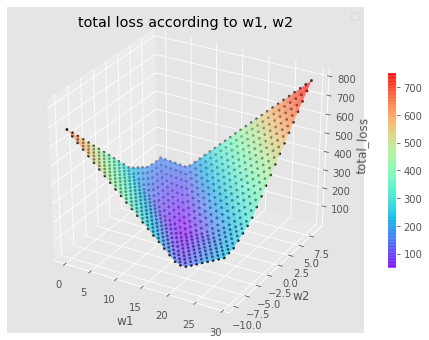

In [84]:
fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')
# w1,w2에 대한 loss 시각화
ax.scatter3D(W1, W2, L, c='k', marker='.')
surf = ax.plot_surface(W1, W2, L, cmap = 'rainbow', alpha=0.6)
fig.colorbar(surf, shrink=0.6)

ax.set_title('total loss according to w1, w2')
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('total_loss')
plt.legend()
plt.show()

### **| step 4. 예측 (Prediction)**

* 최적화된 파라미터 정의

In [89]:
#loss rk 값이 최소값 일때 w1,w2 의 값
L.shape, np.min(L), np.argmin(L) # 최소값의 인덱스 반환
min_idx = np.argmin
W1.flatten(min_idx)
W2.flatten(min_idx)
print(w1_, w2_, np.min(L))

TypeError: ignored

In [90]:
idx = np.unravel_index(np.argmin(L, axis=None), L.shape)
print(np.min(L), idx)
print(W1[idx], W2[idx])
w1_ , w2_ = W1[idx], W2[idx]

45 (9, 13)
13 -1


* 학습 완료된 모델의 최종 손실 계산

In [91]:
propagation(x, ys, w1_, w2_ )

45

* 학습 완료된 모델에 대한 예측 시각화

In [92]:
x1_every = np.arange(10)
x2_every = np.arange(10)
X1_every, X2_every = np.meshgrid(x1_every, x2_every)
Y_pred = model_multi(X1_every, X2_every, w1_, w2_)
X1_every.shape, X2_every.shape

((10, 10), (10, 10))

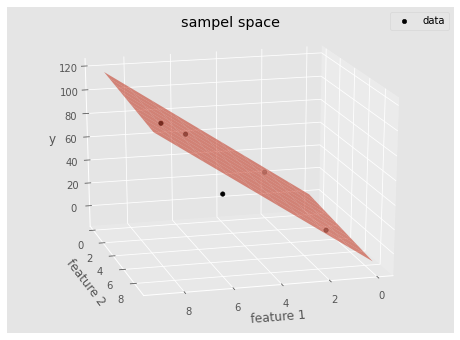

In [93]:
fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')
# x1(피처1), x2(피처2), y
x1s = x[:, 0] # 모든 샘플, 첫번째 피처
x2s = x[:, 1] # 모든 샘플, 두번째 피처
ax.scatter3D(x1s, x2s, ys, c='k', label='data')
# 예측 모델
ax.plot_surface(X1_every, X2_every, Y_pred, alpha=0.6)

ax.set_title('sampel space')
ax.set_xlabel('feature 1')
ax.set_ylabel('feature 2')
ax.set_zlabel('y')
ax.view_init(20,75)
plt.legend()
plt.show()

* 공부시간이 6시간이고 수면시간 5시간 일 때 예상 점수는?


In [95]:
model_multi(6, 5, w1_, w2_)

73

### **| step 5. 평가 (Evaluation)**

* 훈련 데이터셋


|공부시간|수면시간|종합점수|
|------|---|--|
|2|9|20|
|6|8|50|
|4|7|60|
|7|6|90|
|8|6|100|

* 테스트 데이터셋

|공부시간|수면시간|종합점수|
|------|---|--|
|1|7|15|
|3|8|25|
|5|7|60|
|5|6|90|
|10|7|95|

* 테스트 데이터셋 정의

In [96]:
x_test = np.array([1,7,3,8,5,7,5,6,10,7]).reshape(5,2)
ys_test = np.array([15,25,60,90,95])
x_test.shape, ys_test.shape

((5, 2), (5,))

* 학습 완료된 모델에 테스트 데이터로 최종 손실 계산

In [97]:
propagation(x_test, ys_test, w1_,w2_)

76

* 학습 완료된 모델에 테스트 데이터 예측 시각화

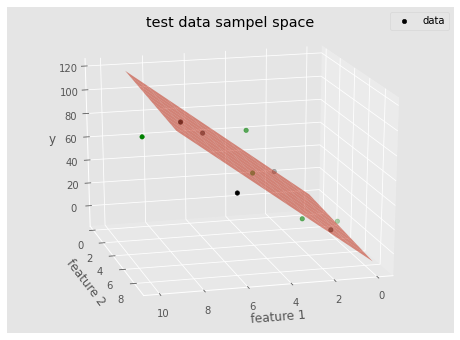

In [100]:
fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')
# x1(피처1), x2(피처2), y
x1s = x[:, 0] # 모든 샘플, 첫번째 피처
x2s = x[:, 1] # 모든 샘플, 두번째 피처
ax.scatter3D(x1s, x2s, ys, c='k', label='data')
# 예측 모델
ax.plot_surface(X1_every, X2_every, Y_pred, alpha=0.6)
# 테스트 모델
ax.scatter(x_test[:, 0], x_test[:, 1], ys_test, c='g')

ax.set_title('test data sampel space')
ax.set_xlabel('feature 1')
ax.set_ylabel('feature 2')
ax.set_zlabel('y')
ax.view_init(20,75)
plt.legend()
plt.show()

## 클래스 작성하기 ★★★
---

```
단순 선형회귀 분석 클래스를 작성합니다.

model = Model() # 모델 클래스가 생성됩니다.
model.fit(xs, ys) # 최적화가 진행됩니다.
model.predict(xs) # 예측을 진행합니다.
model.validation(xs, ys) # 평가를 진행합니다.
```

In [179]:
class simplemodel():
  def __init__(self):
    self.w = 1 # 초기 w값
    self.loss = 1000 # 초기 loss 값
  
  def model(self, x, w): # 모델
    return w*x
  
  def propagation(self, xs, ys, w): # 손실을 구하는 함수
    total_loss = 0
    for x,y in zip(xs, ys):
      y_pred = self.model(x, w=w)  # 예측값
      loss = np.abs(y_pred-y)  # 손실
      total_loss += loss  # 전체 손실
    return total_loss/len(xs) # 전체 손실의 평균

  def fit(self, x, y, grid=[-10,10]): # 최적화 함수
    for w in range(grid[0], grid[1]): # 그리드 어떻게 쓰는건지 모르겠다.
      loss_tmp = self.propagation(x, y, w)
      if self.loss > loss_tmp: # 초기에 정해놓은 loss 값이 크면 w값을 바꿔가면서 계속 loss값을 구함
        self.loss = loss_tmp  # 진행하면서 초기 loss 값이 변함
        self.w = w # 진행하면서 초기 w값도 같이 변함
        print(f'w: {w}  loss:{np.round(loss_tmp,2)}')
      else:   # 만약 loss 값이 다음 loss 값보다 작을 경우 for 루프가 멈춤 (즉 최소값에서 루프가 멈춤)
        print(f'w: {w}  loss:{np.round(loss_tmp,2)}, stop learning')
        break 

  def predict(self, xs): # 예측 함수
    return xs*self.w

  def validation(self, xs, ys): # 평가 함수 (loss를 구하는함수와 동일)
    return self.propagation(xs, ys, self.w)

In [167]:
xs = np.array([3,5,5,7,8])
ys = np.array([20, 50, 60, 90, 100])

model = simplemodel()
print('* 초기 예측값:' , model.predict(xs))
print('* 초기 평가:', model.validation(xs, ys))

model.fit(xs, ys, [0, 15])
print('* 학습 후 예측값:' , model.predict(xs))
print('* 학습 후 평가:', model.validation(xs, ys))

* 초기 예측값: [3 5 5 7 8]
* 초기 평가: 58.4
w: 0  loss:64.0
w: 1  loss:58.4
w: 2  loss:52.8
w: 3  loss:47.2
w: 4  loss:41.6
w: 5  loss:36.0
w: 6  loss:30.4
w: 7  loss:25.2
w: 8  loss:20.8
w: 9  loss:16.4
w: 10  loss:12.0
w: 11  loss:9.6
w: 12  loss:7.2
w: 13  loss:8.8, stop learning
* 학습 후 예측값: [36 60 60 84 96]
* 학습 후 평가: 7.2


In [196]:
w= 1
losses =1000
def propagation(xs, ys, w):
    total_loss = 0
    for x,y in zip(xs, ys):
      y_pred = model_simple(x, w=w)
      loss = np.abs(y_pred-y)
      total_loss += loss
    return total_loss/len(xs)

In [191]:
propagation(xs,ys,w)

58.4

In [199]:
def fit(x, y, grid=[-10,10]):
  losses =1000
  for w in range(grid[0], grid[1]):
    loss_tmp = propagation(x, y, w)
    if losses > loss_tmp:
      losses = loss_tmp
      sw = w
      print(f'w: {w}  loss:{np.round(loss_tmp,2)}')
    else:
      print(f'w: {w}  loss:{np.round(loss_tmp,2)}, stop learning')
      break 

In [200]:
fit(xs, ys, [0, 15])

w: 0  loss:64.0
w: 1  loss:58.4
w: 2  loss:52.8
w: 3  loss:47.2
w: 4  loss:41.6
w: 5  loss:36.0
w: 6  loss:30.4
w: 7  loss:25.2
w: 8  loss:20.8
w: 9  loss:16.4
w: 10  loss:12.0
w: 11  loss:9.6
w: 12  loss:7.2
w: 13  loss:8.8, stop learning


In [202]:
grid=[0,15]
for w in range(grid[0], grid[1]):
  print(w)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
